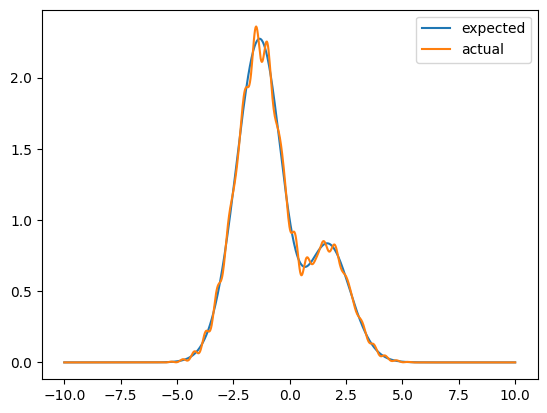

In [1]:
import mrafit.wavelet_bases as wavelet_bases
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae


def test_g4():
    """There are the coefficients discovred by applying combined orthogonality and complteteness optimization"""
    coeffs = [-0.01244825, -0.10544227, 0.41174275, -0.66587987,  0.66587987, -0.66587987, \
    1.66355312, -0.66587987,  0.66587987, -0.66587987,  0.41174275, -0.10544227, \
    -0.01244825]
    
    """ This paramter controls how preicely you want to approximate a function, smaller the value better the approximation"""
    resolution = 0.5

    wid = 10
    N = 800
    error_bound = 10e-2 * resolution
    
    """ Use this section if you want to test gausslet with Stephen White's coefficients"""
    gb = wavelet_bases.Gausslet_Basis(resolution=resolution, wavelet_coefficients=coeffs[int(len(coeffs)/2):])

    """ Sample function to be approximated, you can change it as per your need"""
    X = np.linspace(-wid, wid, N)
    func = lambda x : np.exp(-x**2/3) * (x**2 - x + 1)
    coeffs, approx_func, error = gb.get_mra_approx(func, X)
        
    y_expected = np.vectorize(func)(X)
    plt.plot(X, y_expected, label = "expected")
    plt.plot(X, approx_func, label = "actual")
    plt.legend()
    plt.show()
    
    assert mae(approx_func, y_expected) <= error_bound
    
    
test_g4()
